In [257]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [258]:
df = pd.read_csv('./Data Collection/Combined_df.csv', index_col = 'county')
jack = pd.read_csv('./Data Collection/Jacks_df.csv', index_col = 'county_name')
jack.drop(columns = 'Unnamed: 0', inplace = True)


In [259]:
jack.head()

,2012_unemp,2016_unemp,2020_unemp,2012_var_state,2016_var_state,2020_var_state,median_income_2012_2016_16_dollars,median_income_2020_16_dollars
county_name,,,,,,,,
Anderson,0.036,0.043,0.056,-0.029,-0.005,-0.012,42146,44871
Andrews,0.031,0.047,0.082,-0.034,-0.001,0.014,70121,69369
Angelina,0.051,0.059,0.076,-0.014,0.011,0.008,44185,47917
Aransas,0.068,0.056,0.085,0.003,0.008,0.017,44851,49153
Archer,0.034,0.043,0.053,-0.031,-0.005,-0.015,62407,59010


In [260]:
df['total_2020']

county
anderson county    58199
andrews county     22269
angelina county    90437
aransas county     27699
archer county       8344
                   ...  
wood county        45292
yoakum county       9225
young county       18712
zapata county      14409
zavala county      12682
Name: total_2020, Length: 254, dtype: int64

In [261]:
jack.head()

,2012_unemp,2016_unemp,2020_unemp,2012_var_state,2016_var_state,2020_var_state,median_income_2012_2016_16_dollars,median_income_2020_16_dollars
county_name,,,,,,,,
Anderson,0.036,0.043,0.056,-0.029,-0.005,-0.012,42146,44871
Andrews,0.031,0.047,0.082,-0.034,-0.001,0.014,70121,69369
Angelina,0.051,0.059,0.076,-0.014,0.011,0.008,44185,47917
Aransas,0.068,0.056,0.085,0.003,0.008,0.017,44851,49153
Archer,0.034,0.043,0.053,-0.031,-0.005,-0.015,62407,59010


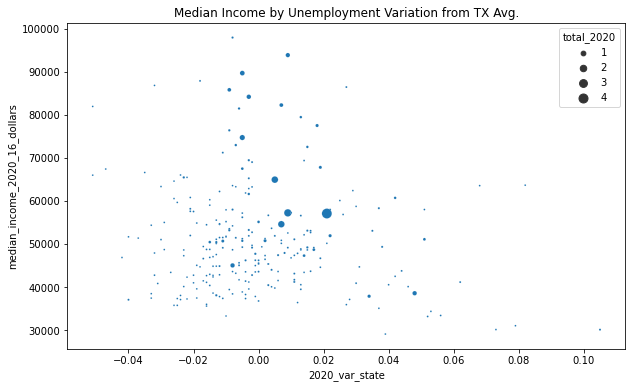

In [262]:
from matplotlib import pyplot

fig = pyplot.subplots(figsize=(10,6))

w = sns.scatterplot(x='2020_var_state', y='median_income_2020_16_dollars', data=df, size = (100*df['total_2020']), sizes = (3,100));
w.set_title('Median Income by Unemployment Variation from TX Avg.');

## Plotting National Popular Vote Results vs TX Statewide Results

In [263]:
tx = pd.read_csv('./Data Collection/Data/TX_statewide_results.csv')

In [264]:
tx.set_index('Year')
tx = tx.head(3)

In [265]:
tx

,Year,Winner (nationally),Votes,Percent,Runner-up (nationally),Votes.1,Percent.1
0,2020.0,Joe Biden,5235216.0,46.42,Donald Trump,5873085.0,52.07
1,2016.0,Donald Trump,4685047.0,52.10,Hillary Clinton,3877868.0,43.12
2,2012.0,Barack Obama,3308124.0,41.38,Mitt Romney,4569843.0,57.17


In [266]:
tx['margin'] = tx['Percent'] - tx['Percent.1']
tx

,Year,Winner (nationally),Votes,Percent,Runner-up (nationally),Votes.1,Percent.1,margin
0,2020.0,Joe Biden,5235216.0,46.42,Donald Trump,5873085.0,52.07,-5.65
1,2016.0,Donald Trump,4685047.0,52.10,Hillary Clinton,3877868.0,43.12,8.98
2,2012.0,Barack Obama,3308124.0,41.38,Mitt Romney,4569843.0,57.17,-15.79


In [267]:
natl = pd.read_csv('./Data Collection/Data/National_Popular_vote.csv')

In [268]:
natl = natl.tail(3)

In [269]:
natl.head()

,Year,Winner & party,Popular vote,Margin
56,2012,Barack Obama,0.5106,0.0386
57,2016,Donald Trump,0.4609,-0.0209
58,2020,Joe Biden,0.5131,0.0445


In [270]:
natl['Natl Pop Vote Margin'] = pd.to_numeric(natl['Margin'])

In [271]:
natl['Natl Pop Vote Margin'] = natl['Natl Pop Vote Margin'] * 100

In [272]:
natl['TX Pop Vote Margin'] = tx['margin']

In [273]:
for i in range(3):
    natl['TX Pop Vote Margin'].iloc[i] = tx['margin'][2-i];

C:\Users\theja\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [299]:
natl['TX Repub. Margin vs Natl'] = -(abs(natl['Natl Pop Vote Margin'])+abs(natl['TX Pop Vote Margin']))


In [275]:
natl.set_index('Year', inplace = True)

In [309]:
natl['Natl Pop Vote Margin'] = abs(natl['Natl Pop Vote Margin'])
natl['TX Pop Vote Margin'] = -abs(natl['TX Pop Vote Margin'])

Text(0, 0.5, 'Democratic Margin')

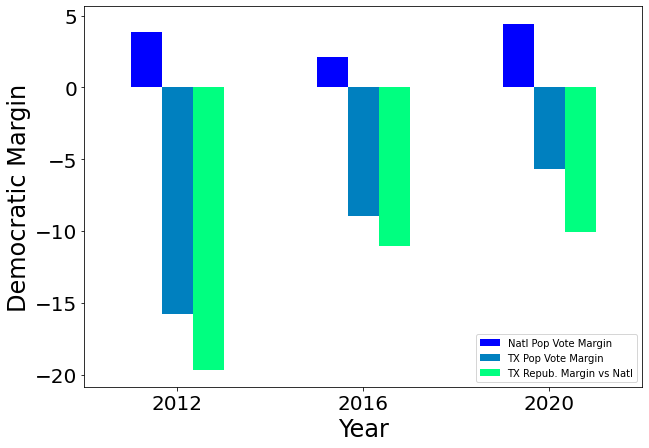

In [315]:
#fig=plt.figure(figsize=(10,10))
natl[['Natl Pop Vote Margin', 'TX Pop Vote Margin', 'TX Repub. Margin vs Natl']].plot(kind='bar', legend=True, grid = False, figsize = (10,7), fontsize = 20, colormap = 'winter', ylabel = 'Democratic Margin', rot = 0)
plt.xlabel('Year', fontsize=24)
plt.ylabel('Democratic Margin', fontsize = 24)

In [278]:
natl.drop(columns = ['Margin'], inplace = True)

In [279]:
natl

,Winner & party,Popular vote,Natl Pop Vote Margin,TX Pop Vote Margin,TX Repub. Margin vs Natl
Year,,,,,
2012,Barack Obama,0.5106,3.86,-15.79,19.65
2016,Donald Trump,0.4609,-2.09,8.98,11.07
2020,Joe Biden,0.5131,4.45,-5.65,10.10


In [295]:
df['hispanic_total_2012'].mean()

0.3292350393700787

In [294]:
df['hispanic_total_2016'].mean()

0.34753503937007896

In [292]:
df['hispanic_total_2020'].mean()

0.3616066929133859